Evaluate genes notebook
=======================

This notebook is for exploratory analysis of the genes and selecting genes for further computations

### Load pathes and dependencies ###

In [1]:
from pathlib import Path
if(Path("./data").exists()):
    base_dir = Path("./")
else:
    base_dir = Path("../")
print(base_dir.absolute())

data_dir = base_dir / "data"
input_dir = data_dir / "input"
output_dir =  data_dir / "output"
genes_dir = input_dir / "genes"
expressions_dir = input_dir / "expressions"

/data/sources/species/notebooks/..


In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path_by_class = genes_dir / "by_animal_class"
path_all = genes_dir / "all"

def kids(folder: Path):    
    for d in folder.iterdir():
        print(d.absolute())
kids(genes_dir)

/data/sources/species/notebooks/../data/input/genes/by_animal_class
/data/sources/species/notebooks/../data/input/genes/by_animal_class.dvc
/data/sources/species/notebooks/../data/input/genes/.gitignore


In [5]:
animal_classes = [ "Mammalia", "Aves", "Reptilia", "Teleostei", "Chondrichthyes", "Coelacanthi" ]

In [7]:
#settings
pd.set_option('display.max_columns', None)
import pprint
pp = pprint.PrettyPrinter(indent=4)


## Load gene tables ##

In [8]:
def load_table(path: Path, index: str = None, dtype: str = None):    
    if index is None:
        return pd.read_csv(str(path), sep="\t", index_col=False, dtype=dtype)
    else:
        return pd.read_csv(str(path), sep="\t", index_col=index, dtype=dtype)

from dataclasses import dataclass
@dataclass
class OrthologyTable:
    one2one: pd.DataFrame
    one2many: pd.DataFrame
    one2many_directed: pd.DataFrame
    one2oneplus_directed: pd.DataFrame
    many2many: pd.DataFrame
    all: pd.DataFrame
    
    def drop(self, column: str):
        self.one2one.drop(columns=[column], inplace=True)
        self.one2many.drop(columns=[column], inplace=True)
        self.one2many_directed.drop(columns=[column], inplace=True)
        self.many2many.drop(columns=[column], inplace=True)
        self.all.drop(columns=[column], inplace=True)        
        return self
            
def load_tables(folder :Path, index: str = None) -> OrthologyTable:
    return OrthologyTable(load_table(folder / "one2one.tsv", index, dtype='string'), 
                          load_table(folder / "one2many.tsv", index, dtype='string'), 
                          load_table(folder / "one2many_directed.tsv", index, dtype='string'), 
                          load_table(folder / "one2oneplus_directed.tsv", index, dtype='string'), 
                          load_table(folder / "many2many.tsv", index, dtype='string'), 
                          load_table(folder / "all.tsv", index, dtype='string'))


In [9]:
birds = load_tables(path_by_class / "Aves", "Homo_sapiens")
reptiles = load_tables(path_by_class / "Reptilia", "Homo_sapiens")
mammals = load_tables(path_by_class / "Mammalia", "Homo_sapiens")
mammals.all.head(4)

,Pan_troglodytes,Equus_caballus,Pan_paniscus,Tursiops_truncatus,Macaca_mulatta,Macaca_fascicularis,Macaca_nemestrina,Ailuropoda_melanoleuca,Ursus_americanus,Heterocephalus_glaber,Rhinolophus_ferrumequinum,Felis_catus,Sus_scrofa,Bos_grunniens,Ovis_aries,Callithrix_jacchus,Ornithorhynchus_anatinus,Phascolarctos_cinereus,Capra_hircus,Suricata_suricatta,Bos_taurus,Otolemur_garnettii,Microcebus_murinus,Sarcophilus_harrisii,Cavia_porcellus,Erinaceus_europaeus,Tupaia_belangeri,Oryctolagus_cuniculus,Meriones_unguiculatus,Cavia_aperea,Monodelphis_domestica,Mus_musculus,Mesocricetus_auratus,Rattus_norvegicus,Mus_spicilegus
Homo_sapiens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000242265,ENSPTRG00000023648,ENSECAG00000001603,ENSPPAG00000030053,ENSTTRG00000003114,ENSMMUG00000032524,ENSMFAG00000045560,ENSMNEG00000037924,ENSAMEG00000019304,<NA>,<NA>,ENSRFEG00010011916,ENSFCAG00000041002,ENSSSCG00000036049,ENSBGRG00000010269,ENSOARG00000002475,ENSCJAG00000033086,<NA>,ENSPCIG00000028966,<NA>,ENSSSUG00005000112,ENSBTAG00000053735,ENSOGAG00000031169,ENSMICG00000001469,ENSSHAG00000001273,ENSCPOG00000037165,<NA>,<NA>,ENSOCUG00000027535,ENSMUGG00000022866;ENSMUGG00000022860,ENSCAPG00000010493,<NA>,ENSMUSG00000092035,ENSMAUG00000018656,<NA>,ENSMSIG00000000323
ENSG00000139990,ENSPTRG00000006478,ENSECAG00000010524,ENSPPAG00000042013,ENSTTRG00000013941,ENSMMUG00000019346,ENSMFAG00000003413,ENSMNEG00000028207,ENSAMEG00000014443,ENSUAMG00000010770,ENSHGLG00100003336;ENSHGLG00100017958;ENSHGLG0...,ENSRFEG00010004811,ENSFCAG00000029516,ENSSSCG00000039701,ENSBGRG00000007044,ENSOARG00000021180,ENSCJAG00000042954,ENSOANG00000012620,ENSPCIG00000010372,ENSCHIG00000021848,ENSSSUG00005006529,ENSBTAG00000048519,ENSOGAG00000008452,ENSMICG00000046667,ENSSHAG00000000665,ENSCPOG00000032392,ENSEEUG00000011616,<NA>,ENSOCUG00000010281,ENSMUGG00000023917,ENSCAPG00000014053,ENSMODG00000010219,ENSMUSG00000049106,ENSMAUG00000004350,ENSRNOG00000004556,ENSMSIG00000015740
ENSG00000073921,ENSPTRG00000004141,ENSECAG00000019264,ENSPPAG00000036162,ENSTTRG00000001554,ENSMMUG00000019618,ENSMFAG00000002978,ENSMNEG00000029285,ENSAMEG00000008778,ENSUAMG00000018059,ENSHGLG00100018440,ENSRFEG00010012989,ENSFCAG00000029123,ENSSSCG00000014913,ENSBGRG00000024679,ENSOARG00000004654,ENSCJAG00000014262,ENSOANG00000013205,ENSPCIG00000018862,ENSCHIG00000015634,ENSSSUG00005014072,ENSBTAG00000001657,ENSOGAG00000013950,ENSMICG00000017261,ENSSHAG00000004629,ENSCPOG00000020758,ENSEEUG00000013932,ENSTBEG00000000600,ENSOCUG00000023809,ENSMUGG00000002616,ENSCAPG00000000355,ENSMODG00000004297,ENSMUSG00000039361,ENSMAUG00000011448,ENSRNOG00000018322,ENSMSIG00000002381
ENSG00000139687,ENSPTRG00000005864,ENSECAG00000014575,ENSPPAG00000002165,ENSTTRG00000004232,ENSMMUG00000007891,ENSMFAG00000004544,ENSMNEG00000030265,ENSAMEG00000003640,ENSUAMG00000011956,ENSHGLG00100008595,ENSRFEG00010000766,ENSFCAG00000024529,ENSSSCG00000009401,ENSBGRG00000020100,ENSOARG00000008246,ENSCJAG00000009076,ENSOANG00000031580;ENSOANG00000015555,ENSPCIG00000029307,ENSCHIG00000004374,ENSSSUG00005003247,ENSBTAG00000006640,ENSOGAG00000007461,ENSMICG00000001747,ENSSHAG00000014024,ENSCPOG00000008683,ENSEEUG00000000076,ENSTBEG00000014454,ENSOCUG00000016404,ENSMUGG00000019124,ENSCAPG00000014795,ENSMODG00000011168,ENSMUSG00000022105,ENSMAUG00000020865,ENSRNOG00000016029,ENSMSIG00000007265


In [10]:
(mammals.all.shape, mammals.one2one.shape)

((67996, 35), (67996, 35))

# Missing value analysis #

## Plot missing genes for all species and mammals (one2one and all modes) ##

In [11]:
def show_missing(df: pd.DataFrame, title: str = "missing plot", ax = None):
     return sns.heatmap(df.notnull(), cbar=False,ax=ax).set_title(title)        

In [12]:
def missing_values(table: OrthologyTable, name: str = None):
    fig, axs = plt.subplots(2,3,figsize=(20,12))
    if not name is None:
        fig.suptitle(name, fontsize=16)
    plt.subplots_adjust(left=0.125, bottom=0.3, right=0.9, top=1.1, wspace=0.3, hspace=0.8)    
    sns.heatmap(table.one2one.notnull(), cbar=False,ax=axs[0,0]).set_title('one2one')    
    sns.heatmap(table.one2oneplus_directed.notnull(), cbar=False,ax=axs[0,1]).set_title('one2oneplus_directed')
    sns.heatmap(table.all.notnull(), cbar=False, ax=axs[0,2]).set_title('ALL')    
    sns.heatmap(table.one2many.notnull(), cbar=False,ax=axs[1,0]).set_title('One2Many')
    sns.heatmap(table.one2many_directed.notnull(), cbar=False,ax=axs[1,1])
    sns.heatmap(table.many2many.notnull(), cbar=False,ax=axs[1,2]).set_title('Many2Many')

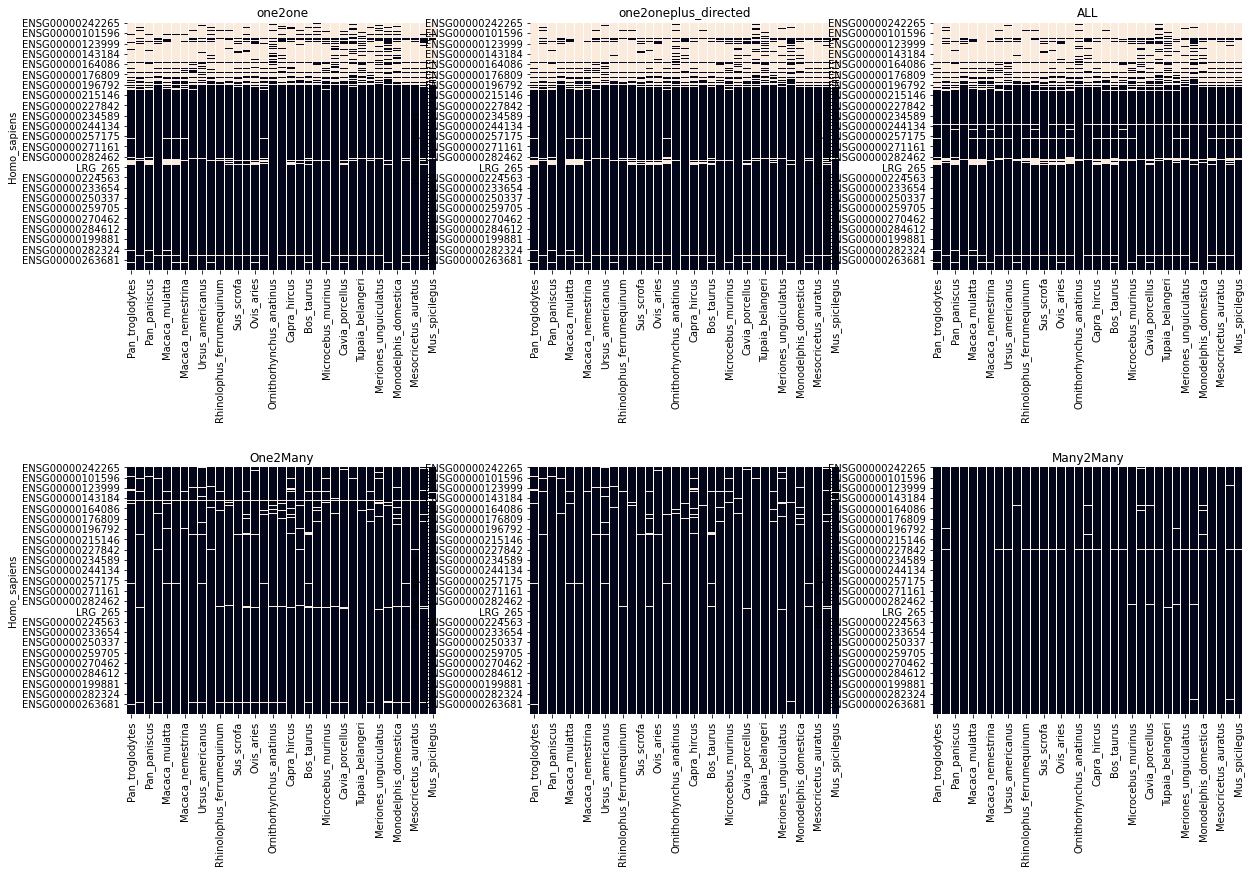

In [13]:
missing_values(mammals)

### Load species and samples ###

In [14]:
species = load_table(input_dir / "species.tsv")
species.head(3)

,species,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,Strigops_habroptila,Kakapo,Aves,60.0,https://www.ensembl.org/Strigops_habroptila,NaN,NaN,NaN,taxon#2489341
1,Anser_brachyrhynchus,Pink-footed goose,Aves,40.9,https://www.ensembl.org/Anser_brachyrhynchus,NaN,NaN,NaN,taxon#132585
2,Gallus_gallus,Red junglefowl,Aves,30.0,https://www.ensembl.org/Gallus_gallus,2710.0,6.005,NaN,taxon#9031


In [15]:
samples = load_table(input_dir / "samples.tsv")
samples.head(3)

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol
0,PRJNA247712,PRJNA247712,SRR1287653,Ailuropoda_melanoleuca,Blood,SL01,no;Model organism or animal;19;female;blood;SL...,Illumina_HiSeq_2000,19,female,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,96,13:39.812,NaN
1,PRJNA247712,PRJNA247712,SRR1287654,Ailuropoda_melanoleuca,Blood,XB01,no;Model organism or animal;12;male;blood;XB01...,Illumina_HiSeq_2000,12,male,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,96,40:17.122,NaN
2,PRJNA247712,PRJNA247712,SRR1287655,Ailuropoda_melanoleuca,Blood,XB02,no;Model organism or animal;6;female;blood;XB0...,Illumina_HiSeq_2000,6,female,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,128,23:40.197,NaN


In [16]:
samples_ext = samples.merge(species,on="species", how="inner")
samples_ext.head(3)

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,PRJNA247712,PRJNA247712,SRR1287653,Ailuropoda_melanoleuca,Blood,SL01,no;Model organism or animal;19;female;blood;SL...,Illumina_HiSeq_2000,19,female,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,96,13:39.812,NaN,Giant panda,Mammalia,36.8,https://www.ensembl.org/Ailuropoda_melanoleuca,NaN,NaN,NaN,taxon#9646
1,PRJNA247712,PRJNA247712,SRR1287654,Ailuropoda_melanoleuca,Blood,XB01,no;Model organism or animal;12;male;blood;XB01...,Illumina_HiSeq_2000,12,male,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,96,40:17.122,NaN,Giant panda,Mammalia,36.8,https://www.ensembl.org/Ailuropoda_melanoleuca,NaN,NaN,NaN,taxon#9646
2,PRJNA247712,PRJNA247712,SRR1287655,Ailuropoda_melanoleuca,Blood,XB02,no;Model organism or animal;6;female;blood;XB0...,Illumina_HiSeq_2000,6,female,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,128,23:40.197,NaN,Giant panda,Mammalia,36.8,https://www.ensembl.org/Ailuropoda_melanoleuca,NaN,NaN,NaN,taxon#9646


In [17]:
by_tissue_count = samples_ext.groupby("tissue").run.count().sort_values(ascending=False)
by_tissue_count

tissue
Liver     149
Brain     133
Kidney     94
Heart      44
Lung       39
Blood      21
Muscle      7
Skin        2
Mix         1
Name: run, dtype: int64

In [18]:
by_species_count = samples_ext.groupby(["species", "common_name", "animal_class"]).run.count().sort_values(ascending=False).to_frame().reset_index()
by_species_count.head(5)

,species,common_name,animal_class,run
0,Rattus_norvegicus,Norway rat,Mammalia,57
1,Cavia_porcellus,Guinea pig,Mammalia,26
2,Mesocricetus_auratus,Golden hamster,Mammalia,24
3,Bos_grunniens,Yak,Mammalia,22
4,Felis_catus,Domestic cat,Mammalia,22


In [19]:
mammals_by_species_count = samples_ext[samples_ext["animal_class"] ==  "Mammalia"].groupby(["species", "common_name"]).run.count().sort_values(ascending=False).to_frame().reset_index()
mammals_by_species_count.head(5)

,species,common_name,run
0,Rattus_norvegicus,Norway rat,57
1,Cavia_porcellus,Guinea pig,26
2,Mesocricetus_auratus,Golden hamster,24
3,Bos_grunniens,Yak,22
4,Felis_catus,Domestic cat,22


In [20]:
def samples_in(*cols):
    spc = by_species_count.set_index("species")
    return sum([spc.loc[c].run for c in cols])

### Count genes ###

count intersection genes

In [21]:
def gc(df: pd.DataFrame, species: pd.DataFrame = None, index_field: str = None) -> pd.DataFrame:
    frame = df.notna().sum().sort_values(ascending=False).to_frame("genes")
    result = frame.reset_index().rename( columns= {"index": "species"})
    if species is None:
        return result
    else:
        field = "common_name" if index_field is None else index_field        
        return result.merge(species, on="species", how="inner").set_index(field)

def count_genes(df: pd.DataFrame, *without):
    return df.drop(columns=np.array(without)).dropna().shape

def gene_counts(table: OrthologyTable, species: pd.DataFrame = None, field: str = None, name: str = None):
    fig, axs = plt.subplots(2,2 ,figsize=(20,20))
    if not name is None:
        fig.suptitle(name, fontsize=16)
    plt.subplots_adjust(left=0.2, bottom=0.5, right=0.9, top=0.9, wspace=0.2, hspace=1)
    rot = 75
    gc(table.all, species,field).genes.plot(kind="bar", ax = axs[0,0], rot=rot)
    gc(table.one2one, species,field).genes.plot(kind="bar", ax = axs[0,1], rot=rot)    
    (table.all.notna().sum() - table.one2one.notna().sum()).sort_values(ascending=False).plot(kind="bar", ax = axs[1,0], rot=rot)
    gc(table.one2oneplus_directed, species,field).genes.plot(kind="bar", ax = axs[1,1], rot=rot)        
    #gc(table.many2many.isna(), species).genes.plot(kind="bar", ax = axs[1,1], rot=rot)

In [22]:
mammals.one2one

,Pan_troglodytes,Equus_caballus,Pan_paniscus,Tursiops_truncatus,Macaca_mulatta,Macaca_fascicularis,Macaca_nemestrina,Ailuropoda_melanoleuca,Ursus_americanus,Heterocephalus_glaber,Rhinolophus_ferrumequinum,Felis_catus,Sus_scrofa,Bos_grunniens,Ovis_aries,Callithrix_jacchus,Ornithorhynchus_anatinus,Phascolarctos_cinereus,Capra_hircus,Suricata_suricatta,Bos_taurus,Otolemur_garnettii,Microcebus_murinus,Sarcophilus_harrisii,Cavia_porcellus,Erinaceus_europaeus,Tupaia_belangeri,Oryctolagus_cuniculus,Meriones_unguiculatus,Cavia_aperea,Monodelphis_domestica,Mus_musculus,Mesocricetus_auratus,Rattus_norvegicus,Mus_spicilegus
Homo_sapiens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000242265,ENSPTRG00000023648,ENSECAG00000001603,ENSPPAG00000030053,ENSTTRG00000003114,ENSMMUG00000032524,ENSMFAG00000045560,ENSMNEG00000037924,ENSAMEG00000019304,<NA>,<NA>,ENSRFEG00010011916,ENSFCAG00000041002,ENSSSCG00000036049,ENSBGRG00000010269,ENSOARG00000002475,ENSCJAG00000033086,<NA>,ENSPCIG00000028966,<NA>,ENSSSUG00005000112,ENSBTAG00000053735,ENSOGAG00000031169,ENSMICG00000001469,<NA>,<NA>,<NA>,<NA>,ENSOCUG00000027535,<NA>,ENSCAPG00000010493,<NA>,ENSMUSG00000092035,ENSMAUG00000018656,<NA>,ENSMSIG00000000323
ENSG00000139990,ENSPTRG00000006478,ENSECAG00000010524,ENSPPAG00000042013,ENSTTRG00000013941,ENSMMUG00000019346,ENSMFAG00000003413,ENSMNEG00000028207,ENSAMEG00000014443,ENSUAMG00000010770,<NA>,ENSRFEG00010004811,ENSFCAG00000029516,ENSSSCG00000039701,ENSBGRG00000007044,ENSOARG00000021180,ENSCJAG00000042954,ENSOANG00000012620,ENSPCIG00000010372,ENSCHIG00000021848,ENSSSUG00005006529,ENSBTAG00000048519,ENSOGAG00000008452,ENSMICG00000046667,ENSSHAG00000000665,ENSCPOG00000032392,ENSEEUG00000011616,<NA>,ENSOCUG00000010281,ENSMUGG00000023917,ENSCAPG00000014053,ENSMODG00000010219,ENSMUSG00000049106,ENSMAUG00000004350,ENSRNOG00000004556,ENSMSIG00000015740
ENSG00000073921,ENSPTRG00000004141,ENSECAG00000019264,ENSPPAG00000036162,ENSTTRG00000001554,ENSMMUG00000019618,ENSMFAG00000002978,ENSMNEG00000029285,ENSAMEG00000008778,ENSUAMG00000018059,ENSHGLG00100018440,ENSRFEG00010012989,ENSFCAG00000029123,ENSSSCG00000014913,ENSBGRG00000024679,ENSOARG00000004654,ENSCJAG00000014262,ENSOANG00000013205,ENSPCIG00000018862,ENSCHIG00000015634,ENSSSUG00005014072,ENSBTAG00000001657,ENSOGAG00000013950,ENSMICG00000017261,ENSSHAG00000004629,ENSCPOG00000020758,ENSEEUG00000013932,ENSTBEG00000000600,ENSOCUG00000023809,ENSMUGG00000002616,ENSCAPG00000000355,ENSMODG00000004297,ENSMUSG00000039361,ENSMAUG00000011448,ENSRNOG00000018322,ENSMSIG00000002381
ENSG00000139687,ENSPTRG00000005864,ENSECAG00000014575,ENSPPAG00000002165,ENSTTRG00000004232,ENSMMUG00000007891,ENSMFAG00000004544,ENSMNEG00000030265,ENSAMEG00000003640,ENSUAMG00000011956,ENSHGLG00100008595,ENSRFEG00010000766,ENSFCAG00000024529,ENSSSCG00000009401,ENSBGRG00000020100,ENSOARG00000008246,ENSCJAG00000009076,<NA>,ENSPCIG00000029307,ENSCHIG00000004374,ENSSSUG00005003247,ENSBTAG00000006640,ENSOGAG00000007461,ENSMICG00000001747,ENSSHAG00000014024,ENSCPOG00000008683,ENSEEUG00000000076,ENSTBEG00000014454,ENSOCUG00000016404,ENSMUGG00000019124,ENSCAPG00000014795,ENSMODG00000011168,ENSMUSG00000022105,ENSMAUG00000020865,ENSRNOG00000016029,ENSMSIG00000007265
ENSG00000119977,ENSPTRG00000002786,ENSECAG00000016594,ENSPPAG00000043730,ENSTTRG00000003261,ENSMMUG00000003103,ENSMFAG00000001575,ENSMNEG00000037026,ENSAMEG00000015948,ENSUAMG00000021674,ENSHGLG00100006578,ENSRFEG00010015913,ENSFCAG00000023675,ENSSSCG00000010496,ENSBGRG00000025629,ENSOARG00000006497,ENSCJAG00000016206,ENSOANG00000019944,ENSPCIG00000020525,ENSCHIG00000021683,ENSSSUG00005007325,ENSBTAG00000011841,ENSOGAG00000003757,ENSMICG00000015970,<NA>,ENSCPOG00000021974,ENSEEUG00000002616,ENSTBEG00000010577,ENSOCUG00000005964,ENSMUGG00000008987,<NA>,ENSMODG00000004976,ENSMUSG00000025008,ENSMAUG00000021808,<NA>,ENSMSIG00000005758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288451,<NA>

In [23]:
#simple function to select top N from nd.array
def top_n(arr: pd.DataFrame,N: int):
    i =  np.argsort(arr[:,1])[-N:]
    return arr[i[::-1]]

In [24]:
top = top_n(np.array(res), 40)

NameError: name 'res' is not defined

In [ ]:
s = pd.Series(top[:,1],[a[0]+"_AND_"+a[1] for a in top[:,0]]).to_frame("combos")
s.plot(kind="barh",figsize=[10,10])

In [ ]:
#super ugly function, TODO: rewrite
def remove_candidates(df: pd.DataFrame, n: int = 40):
    acc = []
    for i in range(0, df.shape[1]):
        for j in range(i+1, df.shape[1]):
            #for k in range(j+1, df.shape[1]):
            to_drop = [df.columns[i], df.columns[j]]
            count = count_genes(df.drop(columns=to_drop))[0]
            acc.append([to_drop, count])    
    top = top_n(np.array(acc), n)
    acc2=[]
    for i in range(0, df.shape[1]):
        col = df.columns[i]            
        for (s1,s2),c in top:
            if col!=s1 and col!=s2:
                to_drop = np.array([s1,s2,col])
                count = count_genes(df.drop(columns=to_drop))[0]
                acc2.append([s1,s2,col,count])   
    return np.array(acc2)

#same as previos but wraps everything in DataFrame
def remove_candidates_df(df: pd.DataFrame, n:int = 40) -> pd.DataFrame:
    candidates = remove_candidates(df,n)
    return pd.DataFrame({"species1":candidates[:,0],"species2":candidates[:,1],"species3":candidates[:,2],"gene_count": candidates[:,3]}).sort_values(by="gene_count", ascending=False)

def samples_lost()

## Let's look how many genes we add and samples we drop when removing some species ##

In [ ]:
#one2one_candidates = remove_candidates_df(mammals.one2one)
#one2one_candidates

In [ ]:
#one_plus_cand = remove_candidates_df(mammals.one2oneplus_directed)
#one_plus_cand

In [ ]:
#mixed = one2one_candidates.merge(one_plus_cand, how="inner", left_on=["species1", "species2", "species3"], right_on=["species1","species2", "species3"])
#mixed["samples_dropped"] = mixed.apply(lambda row: samples_in(row["species1"]) + samples_in(row["species2"]) + samples_in(row["species3"]), axis=1)
#mixed.sort_values(by=["gene_count_y"],ascending=False).head(50)

#### Compare best removal options ####

In [ ]:
to_drop = ["Tursiops_truncatus","Sarcophilus_harrisii","Cavia_aperea", "Tupaia_belangeri", "Erinaceus_europaeus"]
mammals_upd = mammals.one2oneplus_directed.drop(columns = to_drop).dropna().shape
print("Mammals, genes remained:")
print(mammals_upd)
print("samples lost:")
samples_in(to_drop)